# Partie 1 : Modélisation

## 1.1 - Présentation du problème et contexte

L'ADEME (Agence de l'Environnement et de la Maîtrise de l'Energie) a lancé un appel à manifestation dans le but de corriger les problèmes logistiques dans le transport, plus précisément dans les tournées de livraisons (distribution de courrier, livraisons de produits, etc.).

L'équipe de CesiCDP, composée d'Alexandre DUPRÉ, de Lucas HIMPENS, de Vladimir SAVREUX et de Guillaume VANDEVILLE, a répondu à cet appel. CesiCDP a décidé d'orienter son étude dans la gestion de tournée de livraison.
Le travail de l'équipe consiste à calculer le meilleur itinéraire de tournées (cycle) sur un ensemble de villes reliées entre elles et de revenir au point de départ de manière optimale.
L'objectif est donc de minimiser la durée totale de la tournée en prenant en compte le trafic et les variations de celui-ci selon chaque axe, selon les différentes tranches horaires.

Nous nous appuierons sur le problème du voyageur de commerce afin de répondre au problème de l'ADEME. Le problème du voyageur de commerce consiste, pour un ensemble de villes éparpillées, à trouver le plus court chemin qui relie toutes ces villes. C'est pour cela que nous nous basons sur ce problème afin de résoudre de manière efficace le problème de tournées qui nous a été confié.

## 1.2 - Choix de l'algorithme

Nous avons choisit l'algorithme tabou pour résoudre le problème.

L'algorithme tabou est un algorithme métaheuristique. Une métaheuristique est un algorithme d'optimisation avec pour objectif de résoudre les problèmes d'optimisation difficiles. Il existe beaucoup d'algorithmes de ce type, nous définirons donc premièrement ce qu'est l'algorithme tabou, et nous nous pencherons dans une seconde partie sur ses avantages et inconvénients, en comparaison à d'autres algorithmes.


### 1.2.1 - Algorithme tabou

L'algorithme tabou fait partie de la famille des metaheuristiques basées sur la trajectoire. 

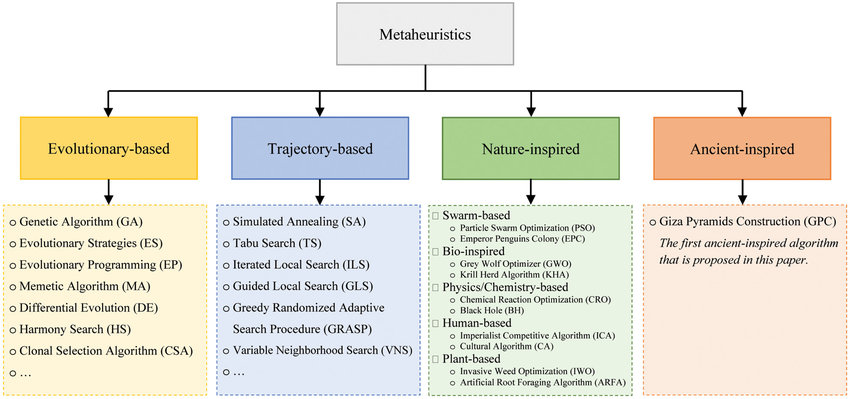

* Les algorithmes de trajectoire disposent d'un seul agent cherchant dans l'espace morceaux par morceaux. Lorsqu'elle se voit présenter une solution, il y a deux cas possible : 
  1. La meilleure solution est toujours acceptée
  2. Une solution moins efficace peut être acceptée dépendant des conditions présentes dans l'algorithme.


* Les algorithmes évolutionnaires quant à eux forment un sous ensemble de calculs évolutionnaires dépendant des techniques et méthodes s'inspirant de l'évolution biologique comme la reproduction, la mutation ainsi que la selection naturelle.


* Les algorithmes naturels eux s'inspirent du comportement des animaux, par exemple celui de la colonie de fourmis.


* Les algorithmes inspirés de l'ancien se déterminent par l'héritage que le passé nous présente, par exemple l'algorithme de construction de pyramides est controllé par le mouvement des ouvriers ainsi que leur pose sur la rampe.


L'algorithme tabou est déterministe, c'est-à-dire qu'il produira toujours la même solution pour une instance donnée ainsi qu'une solution de départ donnée. Il est déterminé pour choisir le meilleur voisin, le poussant à trouver les optimum locaux. L'exploration du voisinage est elle même limitée par des mouvements "tabous", ce qui force l'agorithme à trouver un optimum global. Ces mouvements tabous sont en réalité des contraintes empêchant l'algorithme de retomber dans un optimum local. L'algorithme permet aussi les mouvements non améliorateurs, en nous amenant dans une solution voisine pire que la meilleure pour essayer d'en déterminer une autre.

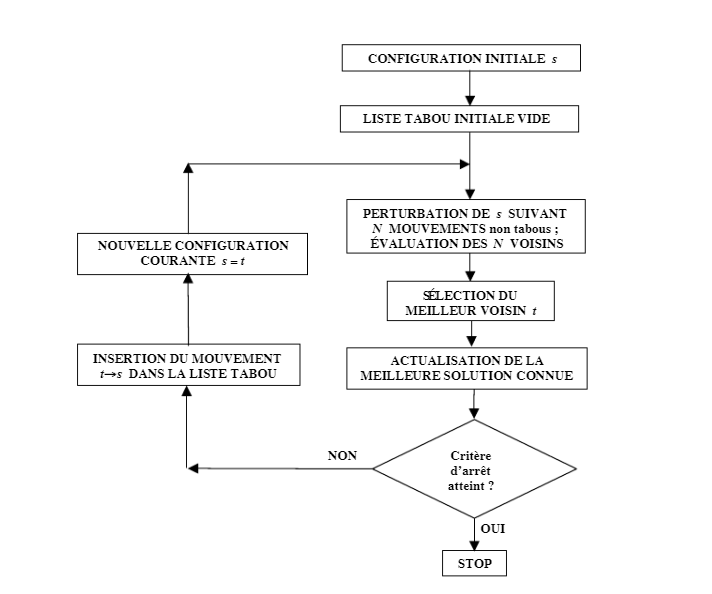

Nous pouvons voir que l'algorithme tabou crée une liste, détermine ses voisins, actualise la meilleure solution. Si le critère d'arrêt n'est pas atteint il insère le mouvement tabou dans la liste, et pour finir crée une nouvelle configuration pour trouver d'autres résultats.

### 1.2.1 - Comparatif

Pour nous aider dans le choix de l'algorithme, nous avons effectué des recherches par rapport à plusieurs critères : la deviation ainsi que la performance.

Les colonnes se désignent ci-dessous:
* Graph size : Nombre de sommets (Graphe de test A ou B)
* GA : Algorithme génétique
* HS : Recherche harmonique
* PSO : Optimisation par essaims particulaires
* QA : Recuit quantique
* SA : Recuit simulé
* TS : Recherche tabou
* 2-OPT

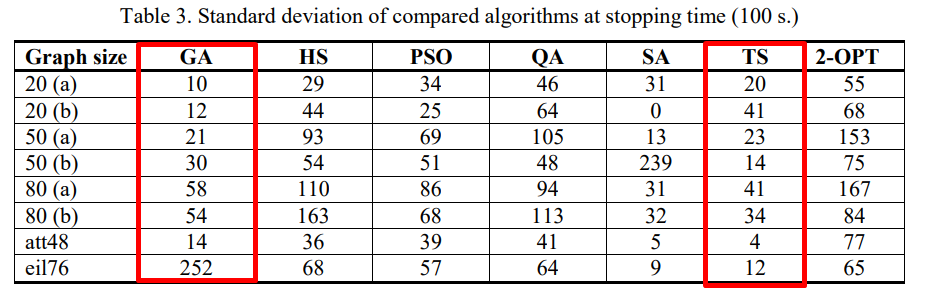

Nous pouvons constater sur cette image que les deux algorithmes les plus stables sont les algorithmes génétiques et la recherche tabou. En effet, plus le nombre montré est élevé, plus l'algorithme a des chances de dévier de la solution optimale.

Ensuite vient la performance de l'algorithme. Pour ce faire, nous avons un tableau déterminant le nombre de chemins parcourus par nos algorithmes en 100 secondes

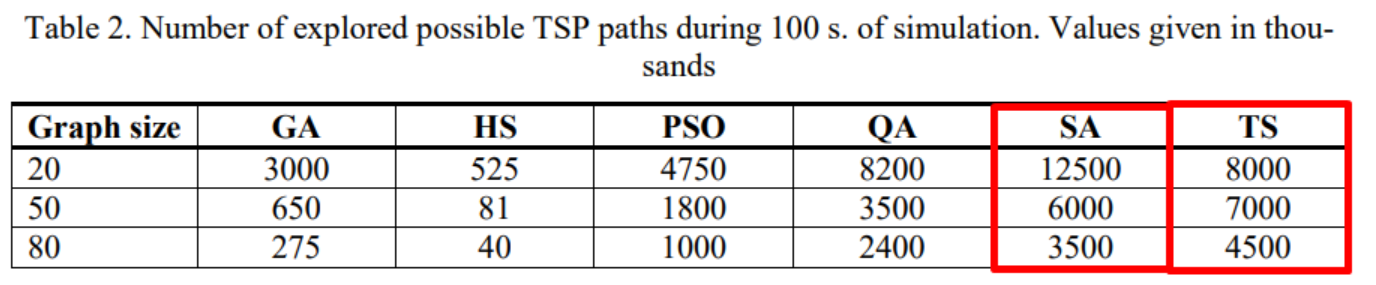

Les algorithmes les plus rapides sont donc le recuit simulé ainsi que la recherche tabou.

Nous pouvons remarquer que l'algorithme tabou ressort dans ces deux tableaux. Il ne possède pas de deviation relativement trop élevée, et il est relativement rapide contrairement à d'autres. D'autres facteurs nous ont convaincu de le choisir, notamment sa convergence rapide vers la solution optimale, son fonctionnement simple à comprendre, sa possibilité de sortir d'un optimal local et bien entendu son efficacité.

Pour finir, son adaptabilité à d'autres problèmes la rends très interessante, cette adaptabilité est due premièrement au fait que l'algorithme soit metaheuristique, mais aussi du fait que l'algorithme comprends des contraintes pouvant être facilement adaptée au cas par cas.

## 1.3 - Choix des contraintes

Le temps de parcours d’une arête varie au cours du temps, afin de représenter la variation du trafic. 

Pour pouvoir représenter le temps, nous avons besoin d'une distance et d'une vitesse moyenne. Chaque arête sera donc composé de plusieurs élements : 
* La distance et la vitesse moyenne
* Le temps, calculé grâce à la distance et à la vitesse moyenne
* On peut inclure également la consommation, en se basant sur une moyenne de consomation par litre au 100 et la distance parcourue.

Pour représenter la variation du trafic, nous ferons varier la vitesse moyenne, ce qui aura pour conséquence d'augmenter le temps de parcours. Plus la vitesse moyenne sera faible, plus le temps de parcours de l'arête sera long. A l'inverse, plus la vitesse moyenne sera élevée, plus le temps de parcours de l'arête sera court. En effet, le fait que la vitesse moyenne soit faible ou elevée modélisera la densité du trafic.

## 1.4 - Démonstration de la complexité théorique du problème

### 1.4.1 - Enoncé de l'objectif
Nous allons faire la réduction à partir du problème Cycle Hamiltonien. Le but est de démontrer que, si on était capable de résoudre le Voyageur de Commerce en temps polynomial, on pourrait aussi utiliser l'algorithme pour résoudre un Cycle Hamiltonien. Or, comme celui-ci est NP-Complet, on en déduit que Voyageur de Commerce est NP-Difficile (et puisqu'il appartient à NP, il est NP-Complet).
Pour cela, il faut trouver un moyen de transformer, en temps polynomial, une instance de Cycle Hamiltonien en instance de Voyageur de Commerce, de manière à ce que les deux instances admettent la même réponse.

### 1.4.2 - Représentation des différents ensembles de compléxité

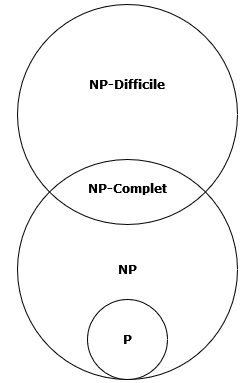



Nous pouvons voir ici qu'un problème de catégorie NP-complet appartient à la fois à la classe NP et à la classe NP-difficile.

### 1.4.3 - Preuve que le Voyageur de commerce appartient à NP
Le problème est dans NP car étant donné une suite de sommets, on peut vérifier en temps polynomial et plus précisément en temps linéaire :
* si la suite de sommets forme un circuit
* si la suite de sommets passant une fois par chaque sommet
* si son coût est inférieur à $t$

Nous pouvons vérifier que le problème se situe dans NP grâce à l'algorithme de certification de NP nommé *np_certificate* ci-dessous.

### 1.4.4 - Transformation d'une instance Voyageur de commerce en Cycle Hamiltonien de manière polynomiale

Voyageur de Commerce considère un graphe complet arête-valué, mais qu'il autorise à passer plusieurs fois par certains sommets, du moment que le circuit total est de taille inférieure à k (on considère le problème de décision sur lequel est basé le problème d'optimisation, k étant un paramètre d'entrée). 

### 1.4.5 - Idée générale de la réduction polynomiale
L'idée générale de cette réduction polynomiale est de construire l’instance de Cycle Hamiltonien en rajoutant les arêtes manquantes, mais avec une valeur de 2 (et en considérant une valeur de 1 pour les arêtes déjà présentes) de manière à rendre leur usage trop couteux, et en considérant un k correspondant au nombre de sommets (on notera que cette transformation se fait en temps polynomial). 

De cette manière, si la réponse à l'instance de Voyageur de Commerce est oui, on sait que le circuit auquel correspond cette réponse respecte les conditions du PVC car passe une et une seule fois par les sommets du graphe, et n'emprunte que les arêtes du graphe de Cycle Hamiltonien. 
Tout cycle empruntant une des arêtes manquantes dans Cycle Hamiltonien aurait une taille supérieure à k, puisque les autres arêtes ont un poids trop élevé, même chose pour les cycles passant plusieurs fois par un sommet. 
La réponse pour l'instance de Cycle Hamiltonien est oui aussi. Idem si la réponse est non. 

Puisqu'on est capable de transformer en temps polynomial une instance de Cycle Hamiltonien en instance de Voyageur de Commerce, de manière à conserver la réponse, Voyageur de Commerce est au moins aussi difficile que Cycle Hamiltonien. 

Comme Cycle Hamiltonien est NP-Complet, et que Voyageur de Commerce est dans NP, Voyageur de Commerce est NP-Complet.

Voir la partie "Preuve que le Voyageur du Commerce appartient à NP"

Cycle hamiltonien ⩽ Voyageur de Commerce. Dans la mesure ou Cycle Hamiltonien est dans NP, le problème est NP-Complet.

1.5 - Choix de la représentation pour le graphe

Afin de représenter informatiquement un graphe, deux moyens sont mis à notre disposition : 
* La liste d'adjacence
* La matrice d'adjacence

Chaque représentation possède ses avantages et ses inconvénients. Dans notre cas, pour choisir notre structure, nous nous baserons sur la densité du graphe.

Une densité de **0** correspond à un graphe creux dans lequel tous les sommets sont isolés.
Une densité de **1** correspond à un graphe complet : chaque sommet est relié à tous les autres sommets.
Plus la densité tend vers 1, plus le graphe est dense. A l'inverse, plus la densité tend vers 0 plus le graphe est creux.

On considèrera le graphe comme étant dense lorsque la densité de celui-ci sera supérieure ou égale à 0,5.

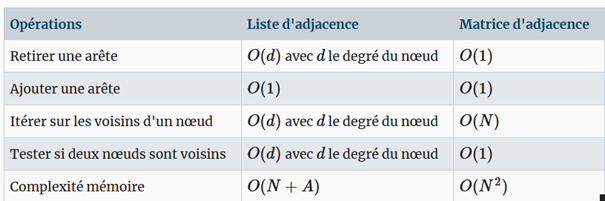

Par souci de simplicité, étant donné que l'algorithme de detection de cycle hamiltoninen demande une densité supérieure à 0.5, alors notre choix sera donc toujours porté sur la matrice. De plus, les opérations à travers la matrice restent bien acceptables en termes de compléxité : d'après le tableau, la complexité la plus élevée est N², qui est la complexité mémoire.

La densité peut se calculer de la façon suivante :

(*nombre_aretes*) / (*nombre_sommets* x *nombre_sommets - 1*)

## 1.5 Exemple concret

Nous pouvons prendre un exemple avec un petit nombre de villes afin d'illustrer notre besoin et de montrer le fonctionnement de l'algorithme.

Nous pouvons partir de cet exemple géographique :

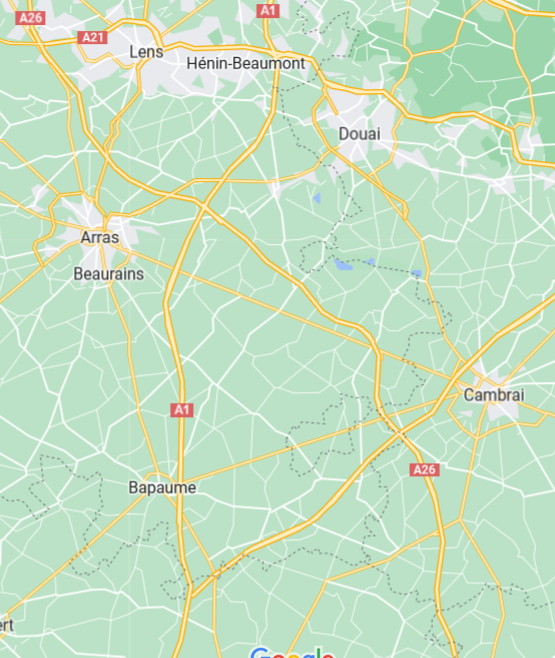


Nous avons choisi ici 6 villes :
* Arras
* Lens
* Hénin-Beaumont
* Douai
* Cambrai
* Bapaume

Nous allons modéliser la carte par un graphe. On définiera les sommets comme suit :
* Arras = 0
* Lens = 1
* Hénin-Beaumont = 2
* Douai = 3
* Cambrai = 4
* Bapaume = 5

Les arêtes seront simplement les portions de route entre chaque ville (on ne représentera pas toutes les routes pour éviter le graphe complet)

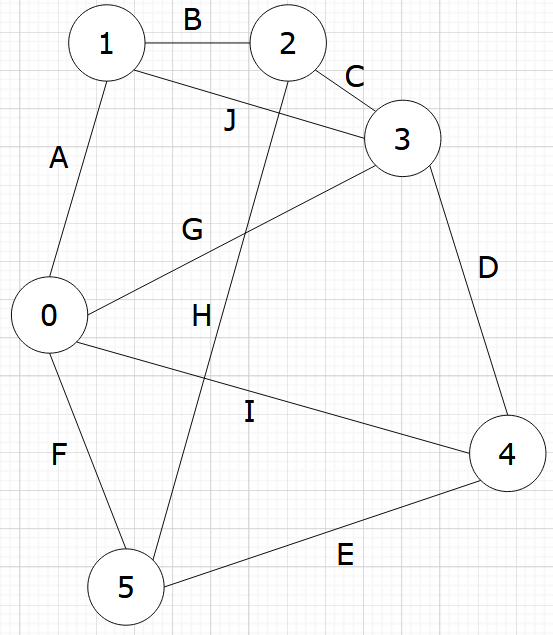

Spécifications des arêtes du graphe ci-dessus (la distance est la distance réelle, pour la vitesse moyenne, on se basera sur la vitesse maximale d'un camion selon le type de route) :
  * A : 
    * Distance : 19 km 
    * Vitesse moyenne : 90 km/h
    * Temps : 12.7 minutes
  * B : 
    * Distance : 11 km 
    * Vitesse moyenne : 45 km/h (on simule ici un bouchon, donc vitesse réduite)
    * Temps : 14.7 minutes
  * C :
    * Distance : 16 km 
    * Vitesse moyenne : 90 km/h
    * Temps : 10.67 minutes
  * D :
    * Distance : 27 km 
    * Vitesse moyenne : 80 km/h
    * Temps : 20.25 min
  * E :
    * Distance : 30 km 
    * Vitesse moyenne : 80 km/h
    * Temps : 22.5 minutes
  * F :
    * Distance : 22 km 
    * Vitesse moyenne : 80 km/h
    * Temps : 16.5 minutes
  * G :
    * Distance : 27 km 
    * Vitesse moyenne : 80 km/h
    * Temps : 20.25 minutes
  * H :
    * Distance : 42 km 
    * Vitesse moyenne : 90km/h
    * Temps : 28 minutes
  * I :
    * Distance : 37 km
    * Vitesse moyenne : 80 km/h
    * Temps : 27.75 minutes
  * J : 
    * Distance : 23 km
    * Vitesse moyenne : 60 km/h (routes de campagne avec traversée de villages)4
    * Temps : 35 minutes

Nous cherchons donc un cycle hamiltonien : on peut par exemple prendre le cycle **0-1-2-3-4-5-0**. 

Calculons la distance et le temps total : 
* Distance : 19 + 11 + 16 + 27 + 30 + 22 = 125 kilomètres
* Temps : 12.7 + 14.7 + 10.67 + 20.25 + 22.25 + 16.5 = 97.07 minutes

Notre but est d'obtenir le plus temps possible. Peut-être existe-il un meilleur temps ?

Voici donc la matrice associée à notre graphe : 

matrix = [\
            [None, A, None, G, I, F],\
            [A, None, B, J, None, None],\
            [None, B, None, C, None, H],\
            [G, J, C, None, D, None],\
            [I, None, None, D, None, E],\
            [F, None, H, None, E, None],\
]

L'exécution de l'algorithme est effectuée plus bas dans le notebook, dans la partie 2.







Comme nous l'avons convenu, chaque arête présente dans la matrice d'adjacence sera représentée par un objet en Python qui a pour attributs : 
* La distance
* La vitesse moyenne 
* Le temps, calculé avec la distance et la vitesse moyenne
* La consommation, calculée avec la distance et une consommation moyenne définie



## 1.6 - Représentation

### 1.6.1 - Problème de décision

*Données* : Un graphe complet $G$ arêtes-valué, et un entier $t$.

*Question* : Existe-t-il un circuit passant au moins une fois par chaque sommet de $G$ et dont la somme des valeurs des arêtes est au plus $t$ ?

*Objectif à optimiser* : Minimiser le temps d'un circuit passant par un ensemble de ville en prenant en compte la variation du trafic.

### 1.6.2 - Modélisation avec la recherche opérationnelle

C'est avec la Recherche Opérationnelle que nous avons modélisé notre problème.

On définit $N$ le nombre de sommet 

**Variables de décision**

* $Y(i,j)$ : Poids de l'arête connectant les sommets $i$ et $j$ avec $i$ et $j$ $\in [0,n]$
* $X(i,j)$ = 1 si la solution a un chemin direct du sommet $i$ à $j$, 0 sinon

**Contraintes**

* $ \sum_{j=1}^{n} X_{i,j} = 1$
* $ \sum_{i=1}^{n} X_{i,j} = 1$
* $X_{i,j} = 0$

**Fonction objectif**

MIN : T = $\sum_{i,j=0}^{n} Y_{i,j} X_{i,j}$

Nous constatons de part la modélisation mathématique du problème du voyageur de commerce, que celle-ci n'est pas linéaire. C'est-à-dire de la forme : $aX + b$ ou $aX$.

C'est pour cela qu'il est impossible de résoudre ce problème de manière linéaire. Nous utiliserons donc les méta-heuristiques pour leur capacité à résoudre ce genre de problème de manière efficace avec un très bon ratio temps/qualité de solution.

# Partie 2 : Implémentation et exploitation

## 2.1 - Structure du projet

In [ ]:
"""This Class represent an edge composed by an average speed and a distance in km"""

class Edge:

    def __init__(self, average_speed, distance, consumption=33):
        self.average_speed = average_speed
        self.distance = distance
        self.consumption = consumption

    def price_consumption_calculus(self):
        return 0 if self.distance <= 0 else round(self.distance * (self.consumption / 100) * 1.8,2)  # default price for 1L is 1.8 euros

    def time_calculus(self):
        return round(0,1) if self.average_speed <= 0 else round((self.distance / self.average_speed) * 60,1)   # h

    def __str__(self):
        return str(self.distance)
        #return "Average Speed : " + str(self.average_speed) + "\ndistance : " + str(self.distance)  + "\nConsumption : " + str(self.consumption) + "\nPrice consumption : " + str(self.price_consumption_calculus()) + "\nTime : " + str(self.time_calculus())

    def __repr__(self):
      return str(self)

In [ ]:
from collections import deque
import queue, random
import copy
import numpy as np

matrix_zone_A = [
    [0,1,1],
    [1,0,1],     
    [1,1,0]
]

matrix_zone_B = [
    [None,1,1,None],
    [1,None,1,None],
    [1,1,None,1],     
    [None,None,1,None]
]

####################################Generate random################################################################################################## 
"""Generate a matrix with Edge objects"""
def generate_matrix(n, max_distance):
  matrix = []
  for t in range(n):
    matrix.append([None] * n)
  for i in range(n):
      fill = random.randint(0,5)
      for j in range(i):
        if i == j or matrix[i][j] != None:
          continue
        if fill > 0:
          distance = random.randint(1, max_distance)  # km
          average_speed = random.randint(0, 90)  # km
          edge = Edge(average_speed, distance)
          matrix[j][i] = edge
          matrix[i][j]  = edge
  
  vertex = random.randint(0,n-1)
  i = 0
  while sum(x is not None for x in matrix[vertex]) < n/2: #make sure that the graph is connexe
      if matrix[vertex][i] == None:
        distance = random.randint(1, max_distance)  # km
        average_speed = random.randint(0, 90)  # km/h
        matrix[vertex][i] = Edge(average_speed, distance)
        matrix[i][vertex] = Edge(average_speed, distance)
      i += 1
  return matrix

res = generate_matrix(8,150)
for i in range(8):
    print(res[i])
"""Return a random matrix"""
def generate_random_matrix(n):
    matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
          if matrix[i][j] == 0:
            weight = 0 if i == j else random.randint(0,1)
            matrix[i][j] = matrix[j][i] = weight
    return matrix
    
##########################################Generate random############################################################################################ 

"""Return vertex degree"""
def degreSommetGrapheMatrice(matrice, sommet):
    degre = sum(matrice[sommet])
    return degre

"""Return vertex degree"""
def degree_sum_object(matrix, vertex):
    return sum(x is not None for x in matrix[vertex])

"""Return a list of vertice neighbors"""
def neighbors_vertices_graph_matrix(matrice, sommet):
    liste = matrice[sommet]
    voisins = [i for i, value in enumerate(liste) if liste[i] != 0]
    return voisins

"""Convert hours to minute if time < 1"""
def minute_to_hour(time):
  return time / 60 if time >= 60 else time

def convert_adjacency_list(matrix):
  dictionary = {}
  n=len(matrix)
  for i in range(n):
      l=[]
      for j in range(n):
          if matrix[i][j]!= None:
              l.append(matrix[i][j])
      dictionary[i]=l
  return dictionary

def sum_distance_vertex(vertex):
  return sum(x.distance for x in vertex if x is not None)

print(convert_adjacency_list(generate_matrix(4,150)))
print(len(convert_adjacency_list(generate_matrix(4,150))))

[None, 67, 90, 98, 93, 44, 144, 148]
[67, None, 33, 47, 8, 28, 89, 55]
[90, 33, None, 92, 73, 97, 138, 44]
[98, 47, 92, None, 103, 25, 146, 87]
[93, 8, 73, 103, None, 115, 5, 9]
[44, 28, 97, 25, 115, None, 150, 117]
[144, 89, 138, 146, 5, 150, None, 82]
[148, 55, 44, 87, 9, 117, 82, None]
{0: [72, 119], 1: [72, 41], 2: [119, 41], 3: []}
4


In [ ]:
#Density calculus

def density_calculus(matrix):
    number_of_vertices = len(matrix[0])
    number_of_edges = 0
    for vertex in range(number_of_vertices):
        number_of_edges += degreSommetGrapheMatrice(matrix,vertex)
    return (number_of_edges / (number_of_vertices * (number_of_vertices-1)))

In [ ]:
##########################################NP-Certificate############################################################################################ 
"""Check if the solution is a cycle, if each previous vertice is a neighbor of the next one, if all vertices are in solution"""
def np_certificate(matrix,vertices_cycle,k):
    vertices_seen = []
    weight = 0
    count = 0
    for i in range(len(vertices_cycle)):
      neighbors  = neighbors_vertices_graph_matrix(matrix,vertices_cycle[i])
      if i+1 < len(vertices_cycle):
        if not vertices_cycle[i+1] in neighbors or vertices_cycle[i] in vertices_seen:
            return False
        vertices_seen.append(vertices_cycle[i])
        weight += matrix[vertices_cycle[i]][vertices_cycle[i+1]]
      if i in vertices_cycle and vertices_cycle not in vertices_seen:
        count += 1
      else :
        if not vertices_cycle[0] in neighbors or vertices_cycle[i] in vertices_seen:
            return False
        vertices_seen.append(vertices_cycle[i])
        weight += matrix[vertices_cycle[i]][vertices_cycle[0]]
    return True if weight <= k and count == len(vertices_cycle) else False

"""print("matrix : ",matrix_zone_A)
print("Cycle :",cycle)
if np_certificate(matrix_zone_A,cycle,3):
    print("The problem belong to NP class")
else:
    print("The problem not belong to NP class")"""
##########################################NP-Certificate############################################################################################ 

'print("matrix : ",matrix_zone_A)\nprint("Cycle :",cycle)\nif np_certificate(matrix_zone_A,cycle,3):\n    print("The problem belong to NP class")\nelse:\n    print("The problem not belong to NP class")'

## 2.2 - Algorithme principal

In [ ]:
#from pulp import *
import matplotlib.pyplot as plt
"""Select random vertices from a matrix and return the sub graph which contains these verteces"""
def city_subset(matrix,n):
  assert n < len(matrix)
  cities_tour = []
  for i in range(n):
    city = random.randint(0,len(matrix)-1)
    while city in cities_tour:
      city = random.randint(0,len(matrix)-1)
    cities_tour.append(city)
  cities_tour.sort()
  city_subset = []
  for i in range(len(cities_tour)):
    line = []
    for j in range(len(matrix)):
      if j in cities_tour:
        if i == j:
          line.append(None)
        else:
          line.append(matrix[cities_tour[i]][j])
    city_subset.append(line)
  return city_subset

def is_solution_valid(matrix,id1,id2,solution):
  #check seulement les 4 sommets
  n = len(matrix)
  if id2 + 1 >= n:
    return matrix[solution[id1]][solution[id2]] != None and matrix[solution[id1]][solution[id1-1]] != None and matrix[solution[id1]][solution[id1+1]] != None and matrix[solution[0]][solution[id2]] != None and matrix[solution[id2]][solution[id2-1]] != None
  elif id1 + 1 >= n:
    return matrix[solution[id1]][solution[id2]] != None and matrix[solution[id1]][solution[id1-1]] != None and matrix[solution[0]][solution[id1]] != None and matrix[solution[id2]][solution[id2+1]] != None and matrix[solution[id2]][solution[id2-1]] != None
  else: 
    return matrix[solution[id1]][solution[id2]] != None and matrix[solution[id1]][solution[id1-1]] != None and matrix[solution[id1]][solution[id1+1]] != None and matrix[solution[id2]][solution[id2+1]] != None and matrix[solution[id2]][solution[id2-1]] != None

"""Check if the graph is hamiltonian"""
def dirac(matrix):
  n = len(matrix)
  for vertex in range(n):
    degree = degree_sum_object(matrix, vertex)
    if degree < n / 2:
        return False
  return True

def total_time_cost(matrix,solution):
  cost = 0
  n = len(solution)
  for i in range(n-1):
    if matrix[solution[i]][solution[i+1]] != None:
      cost += matrix[solution[i]][solution[i+1]].time_calculus()
  return round(cost)

def traffic_variation(matrix, max_distance):
    n = len(matrix) - 1
    new_matrix = copy.deepcopy(matrix)
    vertex = random.randint(0,n)
    neighbor = random.randint(0,n)
    while matrix[vertex][neighbor] == None:
        neighbor = random.randint(0,n)
    old_average_speed = int(matrix[vertex][neighbor].average_speed)
    edge = Edge(random.randint(0,90),random.randint(0,max_distance))
    new_matrix[vertex][neighbor] = edge
    new_matrix[neighbor][vertex] = edge
    print("Traffic variation of the edge ",vertex," ",neighbor, "Old average speed: ", old_average_speed,", New average speed: ",int(new_matrix[vertex][neighbor].average_speed))
    return new_matrix
##########################################Heuristic algorithm Nearest neighbor############################################################################################
"""Heuristic algorithm which find an hamiltonian cycle in polynomiale time"""
def nearest_neighbor(matrix ,vertex_start = 0):
    if dirac(matrix): #if it exist an hamiltonian cycle
      not_found = True
      while not_found: #while i didn't find an hamiltonian cycle
        vertex = vertex_start
        not_found = False
        heuristic_hamiltonian_path = [vertex]
        edges = []
        cost = 0
        distance = 0
        n = len(matrix)
        while len(heuristic_hamiltonian_path) < n:  #while i didn't build the hamiltonian chain
            if not_found:
              break
            min_dist = 1000000
            closest_neighbor = None
            for neighbor in range(n):
              if vertex == neighbor or matrix[vertex][neighbor] is None or neighbor in heuristic_hamiltonian_path:  #if no edge skip or already seen
                  continue

              if min_dist > matrix[vertex][neighbor].distance: #compare min_dist to the current dist
                  min_dist = matrix[vertex][neighbor].distance
                  closest_neighbor = neighbor
            
            if closest_neighbor == None:  #if there is no neighbor move to the next one
              not_found = True
              vertex_start = (vertex_start + 1) % n
              break
            
            cost += matrix[vertex][closest_neighbor].time_calculus()
            distance += matrix[vertex][closest_neighbor].distance
            
            vertex = closest_neighbor #move on to the nearest vertex
            heuristic_hamiltonian_path.append(closest_neighbor) #append the vertex to the list
            
        if matrix[heuristic_hamiltonian_path[0]][heuristic_hamiltonian_path[-1]] == None: #no cycle
              not_found = True
              vertex_start = (vertex_start + 1) % n

        if matrix[heuristic_hamiltonian_path[0]][heuristic_hamiltonian_path[-1]] != None:
          cost += matrix[heuristic_hamiltonian_path[0]][heuristic_hamiltonian_path[-1]].time_calculus() #add last edge to cost
          distance += matrix[heuristic_hamiltonian_path[0]][heuristic_hamiltonian_path[-1]].distance

        heuristic_hamiltonian_path.append(heuristic_hamiltonian_path[0])
      
      return heuristic_hamiltonian_path, round(cost), round(distance),round(distance * (33 / 100) * 1.8,2)
    print("The matrix is not hamiltonian")
    return [],0,vertex_start 

##########################################Tabu Search#############################################################################################################
def find_neighborhood(matrix,solution):
    n = len(matrix)
    neighborhood_of_solution = []
    for vertex1 in solution[1:-1]:  #for each vertex in solution
      index1 = solution.index(vertex1)
      for vertex2 in solution[vertex1:-1]:
        index2 = solution.index(vertex2)
        if vertex1 == vertex2:
              continue

        _tmp = copy.deepcopy(solution)  #copy the hamiltonian cycle 
        _tmp[index1] = vertex2          #exchange 2 vertex
        _tmp[index2] = vertex1

        if not is_solution_valid(matrix,index1,index2,_tmp[:-1]): #check if the neihborhood is a valid solution
          continue

        cost = total_time_cost(matrix,_tmp)                       #calculate total time cost of the new neighborhood solution
        
        _tmp.append(round(cost))

        if _tmp not in neighborhood_of_solution:                  #add the neighborhood solution to the list of neighborhood
            neighborhood_of_solution.append(_tmp)

    if not neighborhood_of_solution:                              #if the neighborhood_of_solution is empty fill it with the initial solution
      copy_sol = copy.deepcopy(solution)
      copy_sol.append(total_time_cost(matrix,solution))
      neighborhood_of_solution.append(copy_sol)

    indexOfLastItemInTheList = n

    #neighborhood_of_solution.sort(key=lambda x: x[indexOfLastItemInTheList])  #sort solutions by cost time
    return neighborhood_of_solution

def tabu_search(matrix,initial_solution,k,tabu_size,max_iter, is_trafic_variation = True):
  nb_iter = 0
  count = 0 #count iteration for variation traffic
  count_local_optimum = 0 #count number of time a local optimum is found
  distance = 0
  tabu_list = deque((), maxlen = tabu_size)

  current_solution = initial_solution[0]
  best = initial_solution[0]
  best_overall = initial_solution[0]

  best_value = initial_solution[1]
  best_value_overall = best_value

  while (nb_iter < max_iter):
    best_value = 999999999
    for neighbor in find_neighborhood(matrix,current_solution):
      neighbor_value = neighbor[-1]
      if neighbor[:-1] == best_value_overall:
        count_local_optimum += 1

      # best no tabu solution found                           
      if neighbor_value < best_value and neighbor not in tabu_list:
        best_value = neighbor_value
        best = neighbor[:-1]

    if count_local_optimum == (1/3 * max_iter):
      break

    #update best value
    if best_value < best_value_overall:
      best_overall = best
      best_value_overall = best_value
      nb_iter = 0

    else: 
      nb_iter +=1

    count += 1
    current_solution = best

    tabu_list.append(current_solution)
    if count % (max_iter -5) == 0 and is_trafic_variation and count < 10 * (max_iter -5):
      matrix = traffic_variation(matrix, 150)  #traffic variation
      heuristic_solution = nearest_neighbor(matrix)
      current_solution = heuristic_solution[0]
      best = heuristic_solution[0]
      best_overall = heuristic_solution[0]
      tabu_list = deque((), maxlen = tabu_size)

      best_value = heuristic_solution[1]
      best_value_overall = heuristic_solution[1]
    #print(nb_iter)
  if best_value_overall > k:
    print("There is no way under",k,"minutes. The best found is :",best_value_overall)

  for i in range(len(best_overall)-1):
    distance += matrix[best_overall[i]][best_overall[i+1]].distance

  return best_overall,round(best_value_overall),distance,round(distance * (33 / 100) * 1.8,2)

matrix = generate_matrix(10,90)
initial = nearest_neighbor(matrix)
print(initial)
res = tabu_search(matrix,initial,9000,10,10)
print(res)
##########################################Tabu Search#############################################################################################################

##########################################Evaluate quality of solution############################################################################################

"""Check if the graph is hamiltonian"""
def ore(matrix):
    n = len(matrix)
    if n >= 3:
        for vertex in range(n):
            for other_vertex in range(vertex + 1,n):
                if matrix[vertex][other_vertex] is None and degree_sum_object(matrix, vertex) + degree_sum_object(matrix, other_vertex) < n:
                    return False
    return True

#graph_with_0_1 = generate_random_matrix(5)
#graph_object = generate_matrix(5, 100)

#res = nearest_neighbor(matrix,80)
#print(res)

##########################################Find Hamiltonian cycle############################################################################################
#Tabu => solve big instance
n= 10
hamilton_cycle_path=[]
matrice=generate_random_matrix(n)
"""If there is no edge between node(k-1) and v or v is already taken, then returns false.
Otherwise, returns true. """
def isValid(hamilton_path, matrix, k, v):
    if matrix[hamilton_path[k-1]][v]==0: #if there is no edge between the older vertex and the current
      return False;

    for i in range(k):          #if vertex is already taken, skip that
      if hamilton_path[i] == v :
        return False
    return True

"""Check if the last and first node have an edge, then add vertex by vertex if there is an edge between them"""
def cycleFound(matrix, hamilton_path,n, k):
    if (k == n):  ##when all vertices are in the path
      if (matrix[hamilton_path[k-1]][hamilton_path[0]] > 0): #if there is an edge between the last and the first vertex
        hamilton_cycle_path = hamilton_path.append(hamilton_path[0])
        return True
      else:
        return False
    for vertex in range(1,n):                     #for all vertices except starting point
      if(isValid(hamilton_path,matrix,k,vertex)): #if possible to add v in the path
        hamilton_path[k]=vertex
        if(cycleFound(matrix,hamilton_path,n,k+1)==True):
          return True
        hamilton_path[k]=-1                       #when k vertex will not in the solution
    return False

def hamiltonianCycle(matrix,hamilton_path,n):
    for i in range(n):
      hamilton_path.append(-1)
    hamilton_path[0]=0   ##first vertex as 0

    if(cycleFound(matrice,hamilton_path,n,1) == False):
      print("Pas de chemin possible")
      return False
    print(hamilton_cycle_path)
    return True

#hamiltonianCycle(matrice,hamilton_cycle_path,n)
##########################################Find Hamiltonian cycle############################################################################################

The matrix is not hamiltonian
([], 0, 0)
Traffic variation of the edge  6   5 Old average speed:  32 , New average speed:  51
The matrix is not hamiltonian
Traffic variation of the edge  8   4 Old average speed:  67 , New average speed:  52
The matrix is not hamiltonian
([], 0, 0, 0.0)


## 2.3 - Cas de tests

### 2.3.1 - Démonstration de l'exemple concret expliqué au début du notebook

In [ ]:
# Creation of Edges
A = Edge(90, 19)
B = Edge(45, 11)
C = Edge(90, 16)
D = Edge(80, 27)
E = Edge(80, 30)
F = Edge(80, 22)
G = Edge(80, 27)
H = Edge(90, 42)
I = Edge(80, 37)
J = Edge(60, 23)

#Creation of the matrix
matrices = [
          [None, A, None, G, I, F],
          [A, None, B, J, None, None],
          [None, B, None, C, None, H],
          [G, J, C, None, D, None],
          [I, None, None, D, None, E],
          [F, None, H, None, E, None],
]

#Execution of nearest neighbors algorithm
print(matrices)
initial_solution = nearest_neighbor(matrices)
print(initial_solution)
#Tabu search with tabu list size at 10 and 20 iterations
tabu_search(matrices, initial_solution, 9000,10, 20,False) 

[[None, 19, None, 27, 37, 22], [19, None, 11, 23, None, None], [None, 11, None, 16, None, 42], [27, 23, 16, None, 27, None], [37, None, None, 27, None, 30], [22, None, 42, None, 30, None]]
([0, 1, 2, 3, 4, 5, 0], 97, 125)


([0, 1, 2, 3, 4, 5, 0], 97, 125, 74.25)

In [ ]:


mat = generate_matrix(60,150)
while not dirac(mat):
  mat = generate_matrix(60,150)
"""
print("####Matrix#####")
for i in range(len(matrix_100)):
    print(matrix_100[i])"""
initial_solution = nearest_neighbor(mat)
print(initial_solution)
res = initial_solution[0]

print()
print("#####Initial solution without variation######")
print("Best path found:", initial_solution[0], ", time duration :",initial_solution[1], "minutes, distance : ",initial_solution[2],"Km, Price consumption :",initial_solution[3],"€")

print("#####Best solution overall without variation######")
best = tabu_search(mat, initial_solution, 99999999,10, 20, False)
print("Best path found:", best[0], ", time duration :",best[1], "minutes, distance : ",best[2], "Km, Price consumption :", best[3],"€")
print()
print("#####Initial solution with variation######")
print("Best path found:", initial_solution[0], ", time duration :",initial_solution[1], "minutes, distance : ",initial_solution[2],"Km",initial_solution[3],"€")

print("#####Best solution overall with variation######")
best = tabu_search(mat, initial_solution, 99999999,10, 20, True)
print("Best path found:", best[0], ", time duration :",best[1], "minutes, distance : ",best[2], "Km, Price consumption :", best[3],"€")

print()
print()
print()
"""
mat = generate_matrix(6,150)
while not dirac(mat):
  mat = generate_matrix(6,150)

print("####Matrix#####")
for i in range(len(mat)):
    print(mat[i])

initial_solution = nearest_neighbor(mat)

res = initial_solution[0]

print()
print("#####Initial solution without variation######")
print("Best path found:", initial_solution[0], ", time duration :",initial_solution[1], "minutes, distance : ",initial_solution[2],"Km, Price consumption :",initial_solution[3],"€")

print("#####Best solution overall without variation######")
best = tabu_search(mat, initial_solution, 200,10, 20, False)
print("Best path found:", best[0], ", time duration :",best[1], "minutes, distance : ",best[2], "Km, Price consumption :", best[3],"€")
print()
print("#####Initial solution with variation######")
print("Best path found:", initial_solution[0], ", time duration :",initial_solution[1], "minutes, distance : ",initial_solution[2],"Km",initial_solution[3],"€")

print("#####Best solution overall with variation######")
best = tabu_search(mat, initial_solution, 200,10, 20, True)
print("Best path found:", best[0], ", time duration :",best[1], "minutes, distance : ",best[2], "Km, Price consumption :", best[3],"€")"""

([1, 14, 23, 33, 12, 24, 6, 22, 2, 8, 50, 51, 17, 32, 58, 45, 35, 31, 49, 34, 20, 36, 4, 55, 21, 38, 53, 37, 5, 3, 30, 25, 39, 16, 41, 43, 56, 10, 40, 7, 42, 59, 28, 57, 18, 46, 13, 19, 27, 9, 0, 15, 11, 29, 26, 47, 44, 52, 48, 54, 1], 1679, 695, 412.83)

#####Initial solution without variation######
Best path found: [1, 14, 23, 33, 12, 24, 6, 22, 2, 8, 50, 51, 17, 32, 58, 45, 35, 31, 49, 34, 20, 36, 4, 55, 21, 38, 53, 37, 5, 3, 30, 25, 39, 16, 41, 43, 56, 10, 40, 7, 42, 59, 28, 57, 18, 46, 13, 19, 27, 9, 0, 15, 11, 29, 26, 47, 44, 52, 48, 54, 1] , time duration : 1679 minutes, distance :  695 Km, Price consumption : 412.83 €
#####Best solution overall without variation######
Best path found: [1, 14, 23, 33, 12, 24, 6, 22, 2, 8, 50, 51, 17, 32, 58, 45, 35, 31, 49, 13, 20, 36, 4, 25, 48, 38, 53, 37, 5, 3, 19, 52, 39, 16, 41, 43, 56, 10, 40, 7, 42, 59, 28, 57, 34, 46, 18, 30, 27, 9, 0, 15, 11, 29, 26, 54, 55, 44, 21, 47, 1] , time duration : 890 minutes, distance :  1244 Km, Price consum

'\nmat = generate_matrix(6,150)\nwhile not dirac(mat):\n  mat = generate_matrix(6,150)\n\nprint("####Matrix#####")\nfor i in range(len(mat)):\n    print(mat[i])\n\ninitial_solution = nearest_neighbor(mat)\n\nres = initial_solution[0]\n\nprint()\nprint("#####Initial solution without variation######")\nprint("Best path found:", initial_solution[0], ", time duration :",initial_solution[1], "minutes, distance : ",initial_solution[2],"Km, Price consumption :",initial_solution[3],"€")\n\nprint("#####Best solution overall without variation######")\nbest = tabu_search(mat, initial_solution, 200,10, 20, False)\nprint("Best path found:", best[0], ", time duration :",best[1], "minutes, distance : ",best[2], "Km, Price consumption :", best[3],"€")\nprint()\nprint("#####Initial solution with variation######")\nprint("Best path found:", initial_solution[0], ", time duration :",initial_solution[1], "minutes, distance : ",initial_solution[2],"Km",initial_solution[3],"€")\n\nprint("#####Best solution o

Nous constatons donc avec le résultat ci-dessus que le meilleur cycle trouvé par l'algorithme Tabou est **0-1-2-3-4-5-0**. La durée totale de la tournée sera donc de 97 minutes, selon les paramètres des différentes routes (distance et vitesse moyenne.)

### 2.3.2 - Recherche Tabou avec 20 villes

In [ ]:
#Generate the matrix of 20 vertexes
matrix_20 = generate_matrix(20, 100)

#### Sans variation de trafic

In [ ]:
#initial solution
initial_solution = nearest_neighbor(matrix_20)

#Tabu search with tabu list size at 10 and 20 iterations
tabu_search(matrix_20, initial_solution, 9000,10, 20, False)

([0, 10, 1, 19, 6, 13, 2, 14, 7, 5, 15, 4, 17, 18, 9, 16, 12, 11, 3, 8, 0],
 386)

#### Avec variation de trafic

On ne réalisera uniquement un test avec la variation du trafic, car le fonctionnement est le même peu importe le nombre de sommets. 

In [ ]:
#initial solution
initial_solution = nearest_neighbor(matrix_20)

#Tabu search with tabu list size at 10 and 20 iterations
tabu_search(matrix_20, initial_solution, 9000,10, 20)

Traffic variation of the edge  11   2 Old average speed:  27 , New average speed:  43
Traffic variation of the edge  15   16 Old average speed:  33 , New average speed:  80
Traffic variation of the edge  11   9 Old average speed:  19 , New average speed:  17
Traffic variation of the edge  6   13 Old average speed:  48 , New average speed:  64
Traffic variation of the edge  4   15 Old average speed:  78 , New average speed:  85
Traffic variation of the edge  15   7 Old average speed:  56 , New average speed:  68
Traffic variation of the edge  2   16 Old average speed:  40 , New average speed:  67
Traffic variation of the edge  10   12 Old average speed:  50 , New average speed:  5
Traffic variation of the edge  9   0 Old average speed:  20 , New average speed:  36
Traffic variation of the edge  14   6 Old average speed:  48 , New average speed:  48
Traffic variation of the edge  0   9 Old average speed:  36 , New average speed:  67
Traffic variation of the edge  9   14 Old average speed

([0, 19, 1, 12, 11, 4, 15, 5, 7, 10, 16, 14, 8, 9, 6, 3, 13, 17, 18, 2, 0],
 487)

### 2.3.3 - Recherche Tabou avec 50 villes

#### Sans variation de trafic

In [ ]:
#Generate the matrix of 50 vertexes
matrix_50 = generate_matrix(50, 100)

#initial solution
initial_solution = nearest_neighbor(matrix_50)

#Tabu search with tabu list size at 10 and 20 iterations
tabu_search(matrix_50, initial_solution, 9000,10, 20, False)

([0,
  26,
  11,
  20,
  18,
  44,
  4,
  40,
  8,
  30,
  29,
  28,
  34,
  6,
  16,
  23,
  15,
  12,
  25,
  22,
  10,
  14,
  38,
  33,
  46,
  2,
  42,
  39,
  9,
  48,
  21,
  31,
  43,
  45,
  1,
  47,
  35,
  17,
  19,
  7,
  27,
  3,
  5,
  37,
  32,
  36,
  41,
  13,
  24,
  49,
  0],
 566)

### 2.3.4 - Recherche Tabou avec 80 villes

#### Sans variation de trafic

In [ ]:
#Generate the matrix of 50 vertexes
matrix_80 = generate_matrix(80, 100)

#initial solution
initial_solution = nearest_neighbor(matrix_80)

#Tabu search with tabu list size at 10 and 20 iterations
tabu_search(matrix_80, initial_solution, 9000,10, 20, False)



([0,
  8,
  7,
  73,
  68,
  4,
  3,
  5,
  15,
  6,
  30,
  10,
  43,
  38,
  50,
  26,
  34,
  14,
  64,
  52,
  36,
  46,
  60,
  21,
  27,
  53,
  66,
  42,
  62,
  51,
  63,
  57,
  76,
  35,
  75,
  2,
  28,
  24,
  41,
  47,
  22,
  56,
  65,
  18,
  37,
  23,
  39,
  54,
  29,
  55,
  12,
  25,
  44,
  20,
  79,
  58,
  9,
  48,
  13,
  59,
  19,
  40,
  11,
  32,
  31,
  69,
  77,
  67,
  61,
  78,
  74,
  33,
  72,
  17,
  71,
  45,
  49,
  1,
  70,
  16,
  0],
 491)

#Tabu search sur 1000 sommets

In [ ]:
random = generate_matrix(1000,150)
initial = nearest_neighbor(random)
print(tabu_search(random,initial,9999999,10,30,True))

## 2.4 - Etudes statistiques

### 2.4.1 - Borne

In [ ]:
##########################################Evaluate quality of solution############################################################################################
!pip install pulp #install pupl on google environment.
import pulp
def lower_bound(matrix):
    n = len(matrix)

    #problem definition
    prob = pulp.LpProblem('TSP', pulp.LpMinimize)

    # decision variable
    x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n) for j in range(n)), lowBound=0, upBound=1, cat='Integer') #dicts(name, indexs, lowBound=None, upBound=None, cat=0, indexStart=[])

    # objective function  
    cost = pulp.lpSum(matrix[i][j].time_calculus() * x[i, j] for i in range(n) for j in range(n) if matrix[i][j] is not None)
    prob += cost

    # constraints
    for i in range(n):
      prob += x[i, i] == 0
      prob += pulp.lpSum(x[i, j] for j in range(n) if matrix[i][j] is not None) == 1
      prob += pulp.lpSum(x[j, i] for j in range(n) if matrix[j][i] is not None) == 1

    prob.solve()

    return round(pulp.value(prob.objective)) if (pulp.LpStatus[prob.status] == "Optimal") else None 

borne = lower_bound(matrix)
if borne is not None:
    print("borne inférieure : ", borne)

##########################################Statistics with tabu search############################################################################################
def tabu_search_stat(matrix,initial_solution,tabu_size,max_iter):
  #initialize variables
  nb_iter = 0
  tabu_list = deque((), maxlen = tabu_size)

  current_solution = initial_solution[0]
  best = initial_solution[0]
  best_overall = initial_solution[0]

  best_value = initial_solution[1]
  best_value_overall = best_value

  #display variable
  best_found = 0
  best_found_overall = 0

  currents = deque(())
  best_currents = deque(())

  while (nb_iter < max_iter):
    nb_iter +=1
    best_value = 999999999
    for neighbor in find_neighborhood(matrix,current_solution):
      neighbor_value = neighbor[-1]

      # best no tabu solution found                           
      if neighbor_value < best_value and neighbor not in tabu_list:
        best_found += 1
        best_value = neighbor_value
        best = neighbor[:-1]
        
    #update best value
    if best_value < best_value_overall:
      best_found_overall += 1
      best_overall = best
      best_value_overall = best_value

    best_currents.append(best_value_overall)

    currents.append(best_value)

    current_solution = best

    tabu_list.append(current_solution)

  return best_overall, currents, best_currents
##########################################Statistics with tabu search############################################################################################

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


La borne nous permet d'obtenir un seuil optimal afin de mesurer la qualité d'une solution de manière approximatif. Grâce a ce seuil (minimal dans notre cas) nous pouvons mesurer la qualité de la solution du tabu par rapport à un problème donnée.

### 2.4.2 - Statistiques sur une instance de 10 villes

([0, 68, 86, 71, 32, 24, 48, 29, 23, 99, 37, 66, 4, 88, 59, 10, 40, 77, 22, 90, 94, 55, 33, 62, 70, 74, 72, 18, 84, 64, 57, 26, 60, 39, 96, 56, 11, 42, 31, 21, 12, 44, 27, 75, 2, 47, 50, 28, 85, 38, 78, 13, 52, 17, 7, 67, 65, 51, 5, 9, 76, 25, 34, 82, 80, 89, 58, 46, 1, 83, 3, 8, 95, 41, 16, 81, 15, 43, 97, 49, 19, 20, 45, 63, 69, 73, 54, 79, 36, 87, 6, 91, 93, 30, 14, 61, 98, 35, 53, 92, 0], 1002, 0)
726


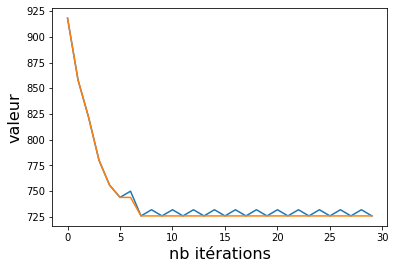

In [ ]:
##########################################Statistics with tabu search matrix size : 10, tabu list size : 100, iteration max : 30##################################
print(init)
tabu_size = max_iteration/2
sol, currents, best_currents= tabu_search_stat(matrice,init,9000,tabu_size, max_iteration)

plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)
res = plt.plot(range(max_iteration), currents)
res = plt.plot(range(max_iteration), best_currents)
##########################################Statistics with tabu search matrix size : 10, tabu list size : 100, iteration max : 30##################################

Le graphe ci-dessus nous montre l'évolution de la valeur de la solution en fonction du nombre d'itérations avec notre algorithme de recherche Tabou. 

Dans cet exemple, nous avons choisi les paramètres suivants : 
* 10 sommets
* 100 pour la taille de la liste Tabou
* 30 itérations

Plus l'algorithme fait d'itérations, plus il se rapproche de la meilleure solution. Nous pouvons voir ici que pour les 5 premières itérations, l'algorithme fait son travail sans trouver de solution de bonne qualité. À la 6ème itération, nous pouvons voir que l'algorithme est arrivé dans un optimum local, qui correspond à une solution. Étant dans cet optimum local, l'algorithme va chercher à sortir de celui-ci pour essayer de trouver une meilleure solution. C'est ce qui se passe à la 7ème itération, l'algorithme tombe à nouveau dans un optimum local. Cette fois-ci, nous pouvons constater que c'est la meilleure solution car l'algorithme retombe à chaque fois dans cet optimum local jusqu'à la 30ème itération.

### 2.4.3 - Statistiques sur une instance de 20 villes

474


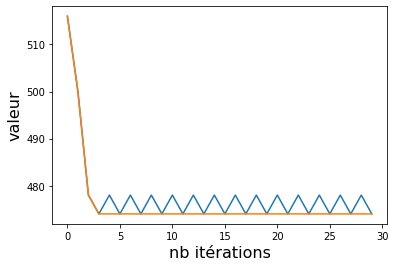

In [ ]:
#Generate the matrix of 20 vertexes
max_iteration = 30
matrix_20 = generate_matrix(20, 100)

#initial solution
initial_solution = nearest_neighbor(matrix_20)

tabu_size = max_iteration/2
sol, currents, best_currents= tabu_search_stat(matrix_20,initial_solution,int(max_iteration/2), max_iteration)

plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)
res = plt.plot(range(max_iteration), currents)
res = plt.plot(range(max_iteration), best_currents)

### 2.4.4 - Statistiques sur une instance de 50 villes

474


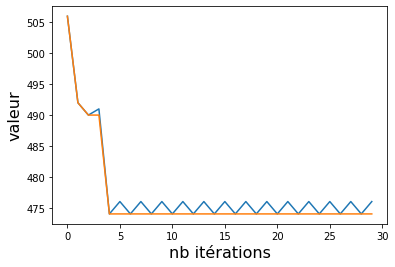

In [ ]:
#Generate the matrix of 20 vertexes
max_iteration = 30
matrix_50 = generate_matrix(50, 100)

#initial solution
initial_solution = nearest_neighbor(matrix_50)

tabu_size = max_iteration/2
sol, currents, best_currents= tabu_search_stat(matrix_50,initial_solution,int(max_iteration/2), max_iteration)

plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)
res = plt.plot(range(max_iteration), currents)
res = plt.plot(range(max_iteration), best_currents)

### 2.4.5 - Statistiques sur une instance de 80 villes

710


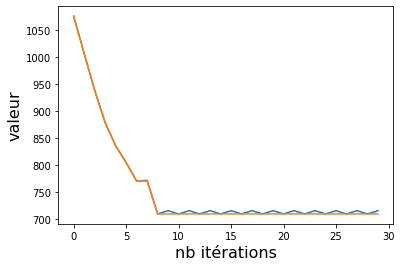

In [ ]:
#Generate the matrix of 20 vertexes
max_iteration = 30
matrix_80 = generate_matrix(80, 100)

#initial solution
initial_solution = nearest_neighbor(matrix_80)

tabu_size = int(max_iteration/2)
sol, currents, best_currents= tabu_search_stat(matrix_80,initial_solution,tabu_size,max_iteration)

plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)
res = plt.plot(range(max_iteration), currents)
res = plt.plot(range(max_iteration), best_currents)

Nous nous sommes contenté de limiter les tests à 80 sommets, car suffisant pour interprêter les résultats et tirer des conclusions sur le comportement du Tabu implémenté. Sur de plus grandes instances, le temps de calcul augmente considérablement.

IntProgress(value=0, layout=Layout(width='100%'), max=80)

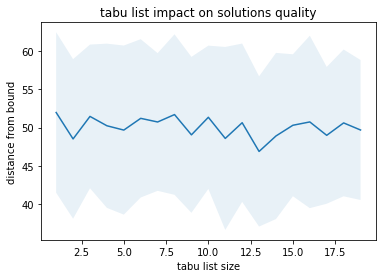

médiane=50.06
moyenne=49.69, écart-type=9.15


In [ ]:
from ipywidgets import IntProgress
from IPython.display import display
import statistics, random
random.seed(a=3)

# test parameters
min_tabu = 1
max_tabu = 20
n = 20

nb_test  = 80
iter_max = 20

# display progression bar
nb_steps_bar =(max_tabu-min_tabu) * nb_test
bar = IntProgress(min=0, max=nb_test, layout={"width" : "100%"})
display(bar)

# storing results
averages  = []
deviations = []

random.seed(a=3)

# loop on tabu list size
for tabu_size in range(min_tabu, max_tabu):            
    bounds = deque(())                                      
    for _ in range(nb_test):                                
        # random generation of instance with its lower bound     
        random_matrix = generate_matrix(n,150)                    
        bound = lower_bound(random_matrix)                          
        initial = nearest_neighbor(random_matrix)                        
        sol = tabu_search(random_matrix,initial, 9000,tabu_size, iter_max, False)  
        val = sol[1]                   
        bar.value += 1                                      
        distance = (bound*100)/val                        
        bounds.append(distance)                             
        
    #average calculation                  
    averages.append(statistics.mean(bounds))               
    deviations.append(np.std(bounds))                       

# hide progression bar
bar.close()

# du=isplay average curve
plt.plot(range(min_tabu, max_tabu), averages)

# display standard deviation
plt.fill_between(range(min_tabu, max_tabu),
                 np.subtract(averages, deviations), # high bound
                 np.add(averages, deviations),      # lower bound
                 alpha=.1)                          # transparency
plt.xlabel("tabu list size")
plt.ylabel("distance from bound")
plt.title("tabu list impact on solutions quality")
plt.show()

print("médiane={:.2f}".format(statistics.median(bounds))) 
print("moyenne={:.2f}, écart-type={:.2f}".format(         
      statistics.mean(bounds),np.std(bounds))) 

Grace à ce graphique, l'on peut voir que plus on augmente la liste tabu plus la qualité de la soution est bonne. Mais on se retrouve dans une situation sans évolution. On observe également que si le nombre d'itération est trop faible, la liste tabu n'a pas le temps d'être remplie, ce qui fait qu'on a une bonne phase de diversification mais la phase d'intensification reste trop faible. Ce qui fait que l'on balaye un large éventail de solution sans s'attarder au niveau des optimum locaux intéressants.
On remarque également, que lorsque la taille de la liste tabu est égal aux nombre d'itération divisé par 2, on obtient une qualité plutôt bonne, on est proche de la moyenne.

In [ ]:
from ipywidgets import IntProgress
from IPython.display import display
import statistics, random
#random.seed(a=3)

min_vertex   = 20
max_vertex   = 220
vertex_steps = 20
nb_test      = 160
tabu_size = 5

iter_max = tabu_size * 2

nb_steps_bar = ((max_vertex-min_vertex)/vertex_steps) * nb_test 

bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
display(bar)

averages   = []
deviations = []
 
for nb_vertex in range(min_vertex, max_vertex, vertex_steps): 
    bounds = deque(())                                        
    for _ in range(nb_test):  
        m = generate_matrix(10, 100)                                
        while not dirac(m):
          m = generate_matrix(10, 100)
        initial = nearest_neighbor(m)
        bound = lower_bound(m)                              
        sol = tabu_search(m, initial,9000,tabu_size, iter_max,False)
        val = sol[1]                            
        bar.value += 1
        distance = (bound*100)/val                                                
        bounds.append(distance)  
        print(val)                         
    averages.append(statistics.mean(bounds))                 
    deviations.append(np.std(bounds))                 

bar.close()

plt.plot(range(min_vertex, max_vertex, vertex_steps), averages)

plt.fill_between(range(min_vertex, max_vertex, vertex_steps),
                 np.subtract(averages, deviations), 
                 np.add(averages, deviations),      
                 alpha=.1)
plt.ylim(top=100)
plt.xlabel("number of available objects")
plt.ylabel("distance from the bound")
plt.title("Number of object impact on solutions quality")
plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=1600)

NameError: ignored

A travers ce graphique l'on peut conclure que plus le nombre de sommet est important plus la solution sera de bonne qualité.

Distance par rapport à la borne

In [ ]:
import random
random.seed(a=3)
bounds = deque(())
nb_tests = 200
max_iter = 200
tabu_size = 100

bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for _ in range(nb_tests):                  
    matrix = generate_matrix(10,150)
    bound = lower_bound(matrix)                        
    initial = nearest_neighbor(matrix)                                                                      
    sol = tabu_search(matrix,initial,99999,tabu_size, max_iter,False)  
    val = sol[1]  
    distance = (bound*100)/val
    print(distance,bound,val)
    bounds.append(distance)                             
    bar.value += 1                                      

bar.close()

plt.hist(bounds, bins = 50,edgecolor = "black")                         
plt.xlabel("Distance from the bound (percentage)")               
plt.ylabel("number of iterations")                               
plt.title("Distance from lower bound")

IntProgress(value=0, layout=Layout(width='100%'), max=200)

NameError: ignored

In [ ]:
import random
random.seed(a=5)

sol_max = None
val_max = 99999999

# multi-start de 500 itérations
for i in range (500):
    initial = nearest_neighbor(random_matrix)
    cur_sol = tabu_search(random_matrix, initial,9000,10, 20)
    cur_val = cur_sol[1]
    if (cur_val  > val_max):
        val_max = cur_val
        sol_max = cur_sol

print("valeur finale = " + str(sol_max[1]))

Traffic variation of the edge  79   32 Old average speed:  6 , New average speed:  45
Traffic variation of the edge  3   59 Old average speed:  86 , New average speed:  31
Traffic variation of the edge  20   14 Old average speed:  11 , New average speed:  47
Traffic variation of the edge  31   48 Old average speed:  83 , New average speed:  69
Traffic variation of the edge  73   31 Old average speed:  47 , New average speed:  1
Traffic variation of the edge  52   35 Old average speed:  49 , New average speed:  23
Traffic variation of the edge  20   9 Old average speed:  46 , New average speed:  17
Traffic variation of the edge  16   0 Old average speed:  38 , New average speed:  0
Traffic variation of the edge  27   21 Old average speed:  14 , New average speed:  21
Traffic variation of the edge  40   25 Old average speed:  89 , New average speed:  69
Traffic variation of the edge  23   25 Old average speed:  45 , New average speed:  49
Traffic variation of the edge  2   46 Old average

KeyboardInterrupt: ignored

In [ ]:
random = generate_matrix(300,150)
sol = nearest_neighbor(random)
print(tabu_search(random,sol,99999,10,30,False))

KeyboardInterrupt: ignored

Le multi-start nous permet de balayer un très large éventail de solutions. Puisque la taille de la matrice est relativement petite (100) par rapport au nombre de start, on peut déduire que la solution trouvée est optimale, l'algorithme a de grandes chances de converger vers la solution optimale.

#Limitations de l'algorithme

Actuellement, l'algorithme agit sur un graphe entier, pas de sous-ensemble défini.
L'algorithme a une solution de très bonne qualité mais prend de plus en plus de temps à s'exécuter lorsque le nombre de sommets augmente.
Enfin, nous pouvons améliorer légérement la complexité et le temps d'exécution en utilisant la liste d'adjacence en complément de la matrice.

# Références bibliographiques

**Source** : "Chapitre 12, Quelques problèmes NP-complets", *enseignement.polytechnique.fr* 
Théorème et démonstration à la partie 12.1.3 "Autour du CIRCUIT HAMILTONIEN"
[Lien](https://www.enseignement.polytechnique.fr/informatique/INF423/uploads/Main/chap12-good.pdf)

**Source** : "Chapitre 1.1, Introduction to Genetic Algorithm" Baluja S., 1994. Population-based incremental learning: A method for integrating genetic search-based function optimization and competitive learning. Tech. rep., Carnegie-Mellon University of Pittsburgh. [Lien](https://www.ri.cmu.edu/publications/population-based-incremental-learning-a-method-for-integrating-genetic-search-based-function-optimization-and-competitive-learning/)

**Source** : “Chapitre 1.2.1, The Turing Machine” Arora S. and Barak B., January 2007, Computational Complexity: A Modern Approach, Scientific book, Princeton University. [Link](https://theory.cs.princeton.edu/complexity/book.pdf)

**Source** : «Chapitre 3.2. Algorithm comparison results » Antosiewicz M., Koloch G. and Kamiński B., January 2013, Choice of best possible metaheuristic algorithm for the travelling salesman problem with limited computational time: Quality, uncertainty and speed. Journal of Theoretical and Applied Computer Science [Link](https://www.researchgate.net/publication/312889331_Choice_of_best_possible_metaheuristic_algorithm_for_the_travelling_salesman_problem_with_limited_computational_time_Quality_uncertainty_and_speed)

**Source** : “Lower bounds algebraic computation trees” M. Ben-Or, 1983. Pages 80-86. Tech rep, Laboratory for Computer Science - Massachusetts Institute of Technology [Link](https://www.researchgate.net/publication/234781245_Lower_Bounds_for_Algebraic_Computation_Trees)

**Source** : « Chapitre 1.3.4 . Le problème du voyageur de commerce » Liedloff M., 2007, Algorithmes exacts et exponentiels pour les problèmes NP-difficiles : domination, variantes et généralisations.  Autre. Université Paul Verlaine.  ffNNT : 2007METZ027Sff. tel-01749022f [Link](https://hal.univ-lorraine.fr/tel-01749022/document)

**Source** : « Chapitre 1.2 Présentation de la méthode » Dréo J., Pétrowski A., Siarry P. et Taillard E., 2003. Métaheuristiques pour l’optimisation difficile [Link](https://univ.scholarvox.com/reader/docid/88818856/page/1)